## Índice
- [Introdução](#intro)
- [Bancos de dados](#databases)
- [Análise exploratória](#analise)
    - [Gráficos](#todas)
    - [Loudness](#loudness)
    - [Tempo](#tempo)
    - [Chorus_hit](#chorus_hit)
    - [Sections](#sections)
- [Modelos preditivos](#modelos)
    - [Decision Tree](#tree)
    - [Random Forest](#forest)
    - [Regressão logística](#reglog)
- [Conclusão](#conclusao)

<div id="intro"></div>

## Introdução
<pre>
   Neste trabalho, buscamos comprovar a capacidade da estatística para encontrar um padrão de música que seria o mais cativante para o povo possível, tendo assim a maior chance possível de ser um hit. Esta temática pode causar surpresa a muitos leitores, pois a musicalidade tende a ser um dom e a música se tornar um hit definitivamente leva em conta muitos fatores, mas <b>será que existe uma fórmula da música?</b>
	Para responder esse questionamento, foi utilizado uma base de dados de mais de 40 mil músicas do spotify, sendo estas classificadas como hit ou flop de acordo com vários critérios para cada artista. Entre esses critérios, a música deve ter aparecido na lista Hot-100 da Billboards semanal pelo menos uma vez na década de lançamento da música.
	A vantagem de utilizar uma base de dados se deve principalmente a diversidade de dados coletados de cada uma dessas músicas, definindo 15 critérios, sendo eles <i>danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration ms, time signature, chorus hit e sections </i>. A descrição detalhada de cada um deles pode ser encontrada no arquivo README.txt da pasta base de dados deste projeto.
</pre> 

## Importando bibliotecas utilizadas:

In [2]:
import numpy as np
import pandas as pd
import pydotplus
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  

<div id="databases"></div>

## Criando databases de cada década:

In [58]:
# Todos as data bases separadas
dados_00 = pd.read_csv('Base_de_dados/dataset-of-00s.csv')
dados_10 = pd.read_csv('Base_de_dados/dataset-of-10s.csv')
dados_60 = pd.read_csv('Base_de_dados/dataset-of-60s.csv')
dados_70 = pd.read_csv('Base_de_dados/dataset-of-70s.csv')
dados_80 = pd.read_csv('Base_de_dados/dataset-of-80s.csv')
dados_90 = pd.read_csv('Base_de_dados/dataset-of-90s.csv')
dados_00

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1
5868,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7,1
5869,"Mass in B minor BWV 232, Missa: Duetto - Chris...",Johann Sebastian Bach,spotify:track:4NIOi1ImMfdufRTsgoKjbD,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11,0
5870,Loog,The Clean,spotify:track:2Qyj2nUdm8y37TCCzDasFn,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11,0


## Juntando todas as músicas em uma database:

In [59]:
# Juntando todas em uma só
todos = [dados_60, dados_70, dados_80, dados_90, dados_00, dados_10]
dados_juntos = pd.concat(todos, keys=['60s:', '70s:', '80s:', '90s:', '00s:', '10s:'])
dados_juntos

track            artist  \
60s: 0     Jealous Kind Of Fella     Garland Green   
     1             Initials B.B.  Serge Gainsbourg   
     2              Melody Twist       Lord Melody   
     3             Mi Bomba Sonó        Celia Cruz   
     4               Uravu Solla       P. Susheela   
...                          ...               ...   
10s: 6393          Lotus Flowers             Yolta   
     6394      Calling My Spirit       Kodak Black   
     6395          Teenage Dream        Katy Perry   
     6396         Stormy Weather    Oscar Peterson   
     6397                   Dust       Hans Zimmer   

                                            uri  danceability  energy  key  \
60s: 0     spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3   
     1     spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   
     2     spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   
     3     spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   
     4     spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11   
...                                         ...           ...     ...  ...   
10s: 6393  spotify:track:4t1TljQWJ6ZuoSY67zVvBI         0.172   0.358    9   
     6394  spotify:track:2MShy1GSSgbmGUxADNIao5         0.910   0.366    1   
     6395  spotify:track:55qBw1900pZKfXJ6Q9A2Lc         0.719   0.804   10   
     6396  spotify:track:4o9npmYHrOF1rUxxTVH8h4         0.600   0.177    7   
     6397  spotify:track:2khIaVUkbMmDHB596lyMG3         0.121   0.123    4   

           loudness  mode  speechiness  acousticness  instrumentalness  \
60s: 0       -7.727     1       0.0403        0.4900          0.000000   
     1      -12.475     1       0.0337        0.0180          0.107000   
     2      -13.392     1       0.0380        0.8460          0.000004   
     3      -12.058     0       0.1040        0.7060          0.024600   
     4       -3.515     0       0.1240        0.8570          0.000872   
...             ...   ...          ...           ...               ...   
10s: 6393   -14.430     1       0.0342        0.8860          0.966000   
     6394    -9.954     1       0.0941        0.0996          0.000000   
     6395    -4.581     1       0.0355        0.0132          0.000003   
     6396   -16.070     1       0.0561        0.9890          0.868000   
     6397   -23.025     0       0.0443        0.9640          0.696000   

           liveness  valence    tempo  duration_ms  time_signature  \
60s: 0       0.0779   0.8450  185.655       173533               3   
     1       0.1760   0.7970  101.801       213613               4   
     2       0.1190   0.9080  115.940       223960               4   
     3       0.0610   0.9670  105.592       157907               4   
     4       0.2130   0.9060  114.617       245600               4   
...             ...      ...      ...          ...             ...   
10s: 6393    0.3140   0.0361   72.272       150857               4   
     6394    0.2610   0.7400  119.985       152000               4   
     6395    0.1390   0.6050  119.999       227760               4   
     6396    0.1490   0.5600  120.030       213387               4   
     6397    0.1030   0.0297   95.182       341396               4   

           chorus_hit  sections  target  
60s: 0       32.94975         9       1  
     1       48.82510        10       0  
     2       37.22663        12       0  
     3       24.75484         8       0  
     4       21.79874        14       0  
...               ...       ...     ...  
10s: 6393    24.30824         7       0  
     6394    32.53856         8       1  
     6395    20.73371         7       1  
     6396    21.65301        14       0  
     6397    71.05343        15       0  

[41106 rows x 19 columns]

<div id="analise"></div>

______
# Análise exploratória inicial:

**adicionar explicação**

In [5]:
# Teste para instrumentalness
faixas = pd.cut(dados_juntos.instrumentalness, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns')*100

instrumentalness,"(-0.001, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
target,,,,,,,,,,
0,38.754753,71.552555,76.246334,78.009631,79.712747,86.15917,86.723164,90.008764,93.522626,95.77823
1,61.245247,28.447445,23.753666,21.990369,20.287253,13.84083,13.276836,9.991236,6.477374,4.22177


## Gráficos de influência para cada uma das variáveis

<div id="todas"></div>

### Gráfico para todas as variáveis que vão de 0 à 1:

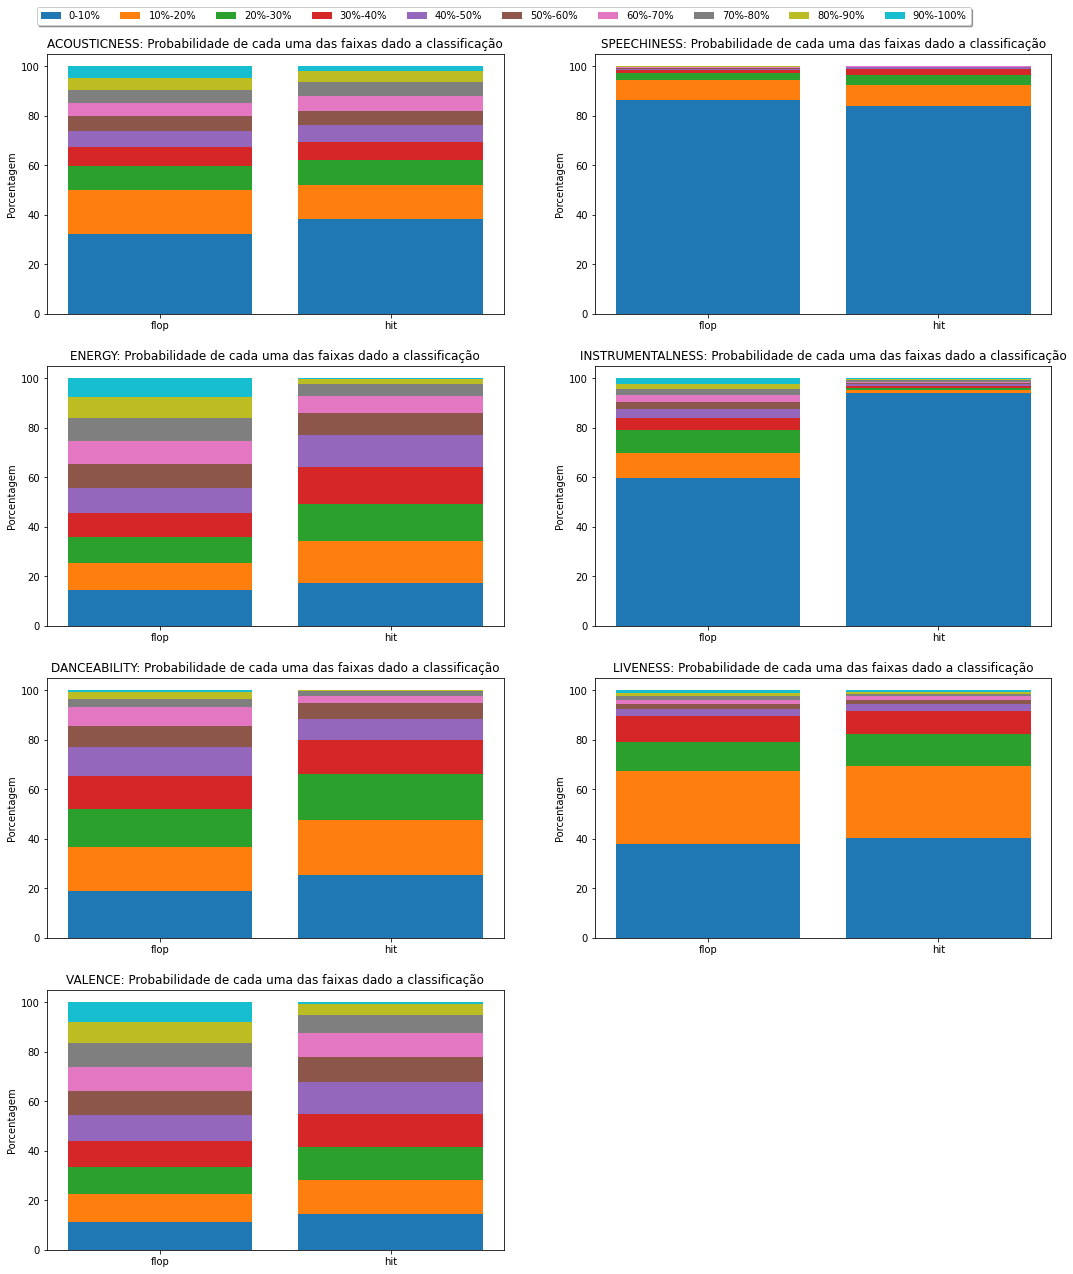

In [40]:
variaveis = ['acousticness', 'speechiness', 'energy', 'instrumentalness', 'danceability', 'liveness', 'valence']
fig = plt.figure(figsize=(18, 22))
for i in range(len(variaveis)):
    variavel = variaveis[i]
    # Separa em faixas e por hit e flop para a variavel em questao.
    faixa_hit = pd.cut(dados_juntos.loc[dados_juntos.target == 1,][variavel], bins=10)
    faixa_flop = pd.cut(dados_juntos.loc[dados_juntos.target == 0,][variavel], bins=10) 
    valores_hit = faixa_hit.value_counts(True)
    valores_flop = faixa_flop.value_counts(True)
    # Deixa os valores em porcentagem
    y2 = np.array([valores_hit[i]*100 for i in range(-10, 0, 1)])
    y1 = np.array([valores_flop[i]*100 for i in range(-10, 0, 1)])
    bottom_y1, bottom_y2 = 0, 0
    plt.subplot(4, 2, i+1)
    # Plota as 10 faixas para flop e hit
    for i in range(0, 10):
        plt.bar(['flop', 'hit'], [y1[i], y2[i]], bottom=[bottom_y1, bottom_y2])
        bottom_y1 += y1[i]
        bottom_y2 += y2[i] 
    plt.ylabel('Porcentagem')
    plt.title(f'{variavel.upper()}: Probabilidade de cada uma das faixas dado a classificação')
legenda = ['0-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%']
plt.legend(legenda, loc='upper center', bbox_to_anchor=(1, 4.8), ncol=10, fancybox=True, shadow=True)
plt.show()

## Interpretação dos gráficos:
- **Acousticness:** As menores faixas são mais presentes em hits, podemos dizer que a acousticness ser menor é bom para música ser um hit.
- **Speechness:** Essa variável aparece em maior quantia nos hits quando na menor faixa assim como nos flops, então a princípio, é dificil de dizer ao certo o impacto dessa variável na classificação da música, por isso voltaremos nela com outras ferramentas para sua análise.
- **Energy:** 
- **Instrumentalness:** Variável mais relevante e quanto menor ela, maior a chance de ser um hit.



_____

<div id="loudness"></div>

## Loudness:

In [11]:
faixas = pd.cut(dados_juntos.loudness, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns')*100

loudness,"(-49.306, -43.953]","(-43.953, -38.654]","(-38.654, -33.354]","(-33.354, -28.054]","(-28.054, -22.754]","(-22.754, -17.455]","(-17.455, -12.155]","(-12.155, -6.855]","(-6.855, -1.556]","(-1.556, 3.744]"
target,,,,,,,,,,
0,100.0,100.0,100.0,100.0,96.182266,88.62069,59.624132,44.124013,39.12971,60.759494
1,0.0,0.0,0.0,0.0,3.817734,11.37931,40.375868,55.875987,60.87029,39.240506


_____

<div id="tempo"></div>

## Tempo:

In [14]:
faixas = pd.cut(dados_juntos.tempo, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns')*100

tempo,"(-0.241, 24.142]","(24.142, 48.285]","(48.285, 72.427]","(72.427, 96.569]","(96.569, 120.712]","(120.712, 144.854]","(144.854, 168.996]","(168.996, 193.138]","(193.138, 217.281]","(217.281, 241.423]"
target,,,,,,,,,,
0,0.0,96.551724,74.646465,53.695255,47.474352,46.531228,50.685579,54.255733,48.717949,50.0
1,100.0,3.448276,25.353535,46.304745,52.525648,53.468772,49.314421,45.744267,51.282051,50.0


____

<div id="chorus_hit"></div>

## Chorus_hit:

In [15]:
faixas = pd.cut(dados_juntos.chorus_hit, bins=10)
pd.crosstab(dados_juntos.target, faixas, normalize='columns')*100

chorus_hit,"(-0.433, 43.318]","(43.318, 86.636]","(86.636, 129.955]","(129.955, 173.273]","(173.273, 216.591]","(216.591, 259.909]","(259.909, 303.227]","(389.864, 433.182]"
target,,,,,,,,
0,48.329188,52.688787,60.93591,65.486726,80.0,83.333333,0.0,100.0
1,51.670812,47.311213,39.06409,34.513274,20.0,16.666667,100.0,0.0


_____


<div id="sections"></div>

## Sections:

In [16]:
intervalo = np.arange(1, 40, 3.5)
faixas = pd.cut(dados_juntos.sections, bins=intervalo)
pd.crosstab(dados_juntos.target, faixas, normalize='columns')*100

sections,"(1.0, 4.5]","(4.5, 8.0]","(8.0, 11.5]","(11.5, 15.0]","(15.0, 18.5]","(18.5, 22.0]","(22.0, 25.5]","(25.5, 29.0]","(29.0, 32.5]","(32.5, 36.0]","(36.0, 39.5]"
target,,,,,,,,,,,
0,90.569395,52.802626,41.58918,46.398586,63.752784,79.900125,90.361446,92.349727,96.551724,92.1875,96.296296
1,9.430605,47.197374,58.41082,53.601414,36.247216,20.099875,9.638554,7.650273,3.448276,7.8125,3.703704


___

<div id='modelos'></div>

# Modelos preditivos:

<div id='tree'></div>

## Uso do decision tree
Escolhemos esse modelo como nosso primeiro, para que pudessemos testar sua eficácia e comparar com a random forest, que se trata de uma versão mais complexa desse modelo.
**explicar decision tree**

In [91]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = features,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('musiquinha.png')
# Image(graph.create_png())

In [60]:
# Separa mais features para testar o quanto elas podem aumentar a eficácia do classificador
todos = [dados_60, dados_70, dados_80, dados_90, dados_00, dados_10]
dados = pd.concat(todos)
features = ['danceability','energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'chorus_hit', 'tempo', 'key', 'mode'
            , 'duration_ms']
X = dados[features]
y = dados.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.67, test_size=.33)

In [61]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6984887578326576


## Precisão do primeiro modelo 


### Essas variáveis não alteraram significantemente o desempenho do classificador .

<div id='forest'></div>

## Random forest
Adotamos como segundo modelo a random forest, visto que é intimamente relacionada com o modelo anterior.
**explicação random forest**

In [62]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [64]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.786361960928861


In [72]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [74]:
importances.head(15)

,importance
feature,
instrumentalness,0.173
acousticness,0.116
danceability,0.108
duration_ms,0.083
loudness,0.082
energy,0.081
speechiness,0.076
valence,0.075
tempo,0.057


### Precisão de aproximadamente 78 % com o uso da random forest

___

<div id='reglog'></div>

## Regressão logística
Como terceiro modelo, foi usado a regressão logística utilizando duas bibliotecas diferentes para comparar os resultados e a metodologia. Além disso, foi analisado os valores de precisão do modelo de regressão e comparado com os valores do modelo de random forest, realçando uma maior acurária no caso de random forest.
**explicação regressão logística**

In [65]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [66]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6776,    0],
       [6789,    0]], dtype=int64)

In [67]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.49952082565425726


In [68]:
X_cp = sm.add_constant(X_train)
model = sm.Logit(y_train, X_cp)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.526497
         Iterations 7


In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                27541
Model:                          Logit   Df Residuals:                    27527
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Jun 2021   Pseudo R-squ.:                  0.2404
Time:                        11:28:09   Log-Likelihood:                -14500.
converged:                       True   LL-Null:                       -19090.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9491      0.159      5.964      0.000       0.637       1.261
danceability         3.2907      0.113     29.231      0.000       3.070       3.511
energy              -1.8209      0.121    -15.034      0.000      -2.058      -1.584
loudness             0.1078      0.005     20.080      0.000       0.097       0.118
speechiness         -3.1663      0.190    -16.651      0.000      -3.539      -2.794
acousticness        -1.4035      0.064    -21.793      0.000      -1.530      -1.277
instrumentalness    -3.4239      0.083    -41.097      0.000      -3.587      -3.261
liveness            -0.1654      0.086     -1.932      0.053      -0.333       0.002
valence              0.3825      0.073      5.228      0.000       0.239       0.526
chorus_hit          -0.0018      0.001     -2.315      0.021      -0.003      -0.000
tempo                0.0018      0.001      3.471      0.001       0.001       0.003
key                  0.0123      0.004      3.008      0.003       0.004       0.020
mode                 0.3906      0.032     12.184      0.000       0.328       0.453
duration_ms      -8.383e-07   1.63e-07     -5.154      0.000   -1.16e-06    -5.2e-07
====================================================================================
"""

Para um nível de significância de 10%, todas as variáveis são relevantes para prever a variável target.

In [70]:
y_pred = results.predict(sm.add_constant(X_test))

In [71]:
resultado = [1 if y > 0.5 else 0 for y in y_pred]
print("Accuracy:", metrics.accuracy_score(y_test, resultado))

Accuracy: 0.7268706229266495


___

<div id='conclusao'></div>

**resumo do projeto envolvendo pergunta**

**responder outro questionamento envolvendo pergunta(a fórmula da música é a mesma sempre ou se altera com o tempo)**